<a href="https://colab.research.google.com/github/MrDarkCoder/face-detech-and-compare/blob/main/facecompare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
from IPython.display import Image

In [2]:
up = files.upload()

Saving people_with_phones.png to people_with_phones.png


Here you need to put your image from your local disk
make sure the file is correct

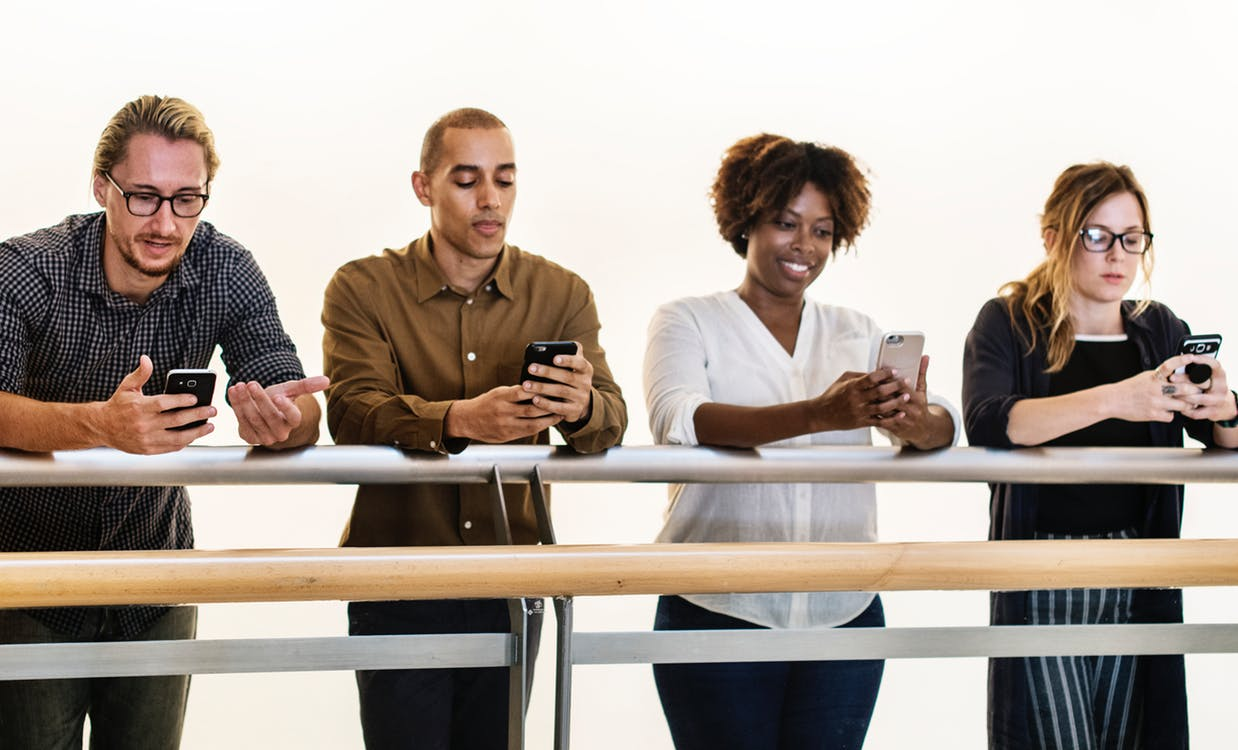

In [3]:
Image("people_with_phones.png")

In [4]:
import cv2
import sys
from google.colab.patches import cv2_imshow

In [5]:
imagePath = "people_with_phones.png"
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [6]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=3,
    minSize=(30, 30)
)

In [7]:
print("[INFO] Found {0} Faces.".format(len(faces)))

[INFO] Found 4 Faces.


In [8]:
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi_color = image[y:y + h, x:x + w]
    print("[INFO] Object found. Saving locally.")
    cv2.imwrite(str(w) + str(h) + '_faces.jpg', roi_color)

[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.


In [10]:
status = cv2.imwrite('faces_detected.jpg', image)
print("[INFO] Image faces_detected.jpg written to filesystem: ", status)


[INFO] Image faces_detected.jpg written to filesystem:  True


now, faces are detected from your image and stored has seperate image files in your file system.
make sure you import the correct image path down

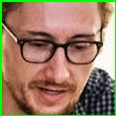

In [11]:
imagePath01 = "/content/116116_faces.jpg"
image01 = cv2.imread(imagePath01)
gray = cv2.cvtColor(image01, cv2.COLOR_BGR2GRAY)
cv2_imshow(image01)

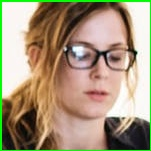

In [12]:
imagePath02 = "/content/151151_faces.jpg"
image02 = cv2.imread(imagePath02)
gray = cv2.cvtColor(image02, cv2.COLOR_BGR2GRAY)
cv2_imshow(image02)

In [15]:
!pip install face_recognition
import face_recognition

     |████████████████████████████████| 100.2MB 74kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=e9f6cfa2d6bcc9b8702e3009d1da766302e05d6900c8819c21a2d16eec845d2c
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
# read 1st image and store encodings
# first = cv2.imread(imagePath01)
# rgb_first = cv2.cvtColor(first, cv2.COLOR_BGR2RGB)

# boxes = face_recognition.face_locations(rgb_first, model["detection_method"])
# encodings1 = face_recognition.face_encodings(rgb_first, boxes)

In [ ]:
# read 2nd image and store encodings
# second = cv2.imread(imagePath02)
# rgb_second = cv2.cvtColor(second, cv2.COLOR_BGR2RGB)

# boxes = face_recognition.face_locations(rgb_second, model["detection_method"])
# encodings2 = face_recognition.face_encodings(rgb_second, boxes)

In [ ]:
# now, compare two encodings
#  optionally pass threshold, by default it is 0.6
# matches = face_recognition.compare_faces(encodings1, encodings2, 0.6)

Above code was for manual modelling and comparing the faces
but Face Recognition is pre-defined and well optimised some methods to perfom task,
Here we encodin the every details in the face of original image and need to compare with the id image 

In [16]:
known_image = face_recognition.load_image_file(imagePath01)
unknown_image = face_recognition.load_image_file(imagePath02)

biden_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

results = face_recognition.compare_faces([biden_encoding], unknown_encoding)

if encoded value are equal the result will show true otherwise it will show false. 

In [17]:
print(results)

[False]
